<a href="https://colab.research.google.com/github/ctg123/ml-projects/blob/main/heart-disease-random-forest/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement

Cardiovascular diseases are the leading cause of death globally. It is therefore necessary to identify the causes and develop a system to predict heart attacks in an effective manner.

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## Import Data

In [ ]:
cardio_data = pd.read_csv("datasets/cep1_dataset.csv")
cardio_data.shape

(303, 14)

# Preliminary Data Analysis

In [ ]:
cardio_data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [ ]:
# Statistical summary
summary = cardio_data.describe()
summary

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [ ]:
cardio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
cardio_data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Now, let us look at whether the dataset has null values or not.

In [ ]:
cardio_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

From this output, our data does not contain null values and duplicates. So, the data is good which will be further analyzed.

# Heart Disease Distribution Report

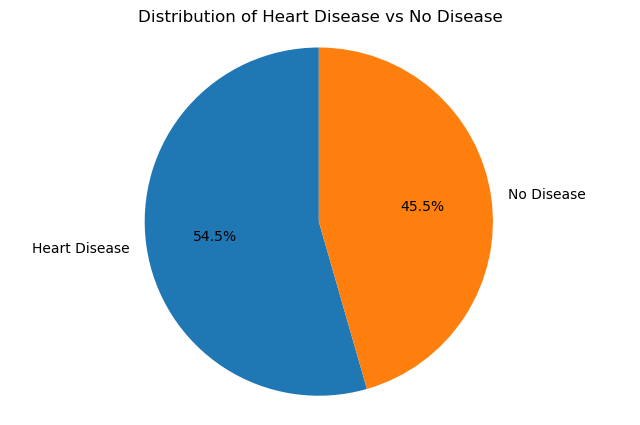

Length of 'disease': 165
Length of 'no disease': 138


In [ ]:
# Count the occurrences of "disease" and "no disease"
disease_counts = cardio_data['target'].value_counts()

# Length of disease and no disease
disease = len(cardio_data[cardio_data['target'] == 1])
no_disease = len(cardio_data[cardio_data['target'] == 0])
labels = 'Heart Disease', 'No Disease'

# Create a pie chart
plt.figure(figsize=(8, 5))
plt.pie(disease_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Heart Disease vs No Disease')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie
plt.show()

# Print the length of disease and no disease
print(f"Length of 'disease': {disease}")
print(f"Length of 'no disease': {no_disease}")


Let's identify the categorical variables and explore them using appropriate tools like count plots.

## Exploring Categorical Variables

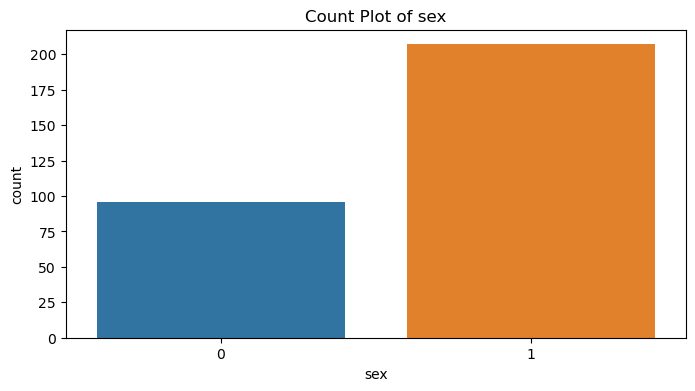

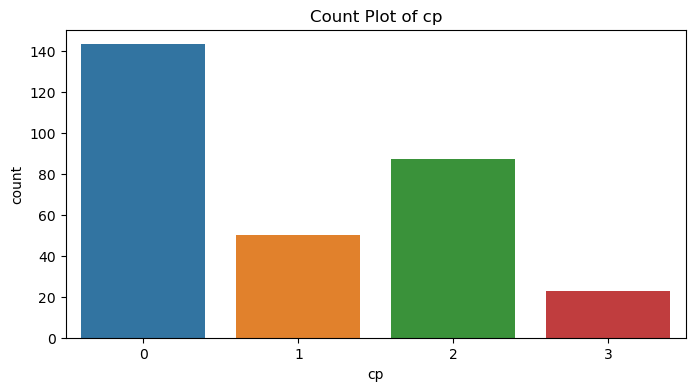

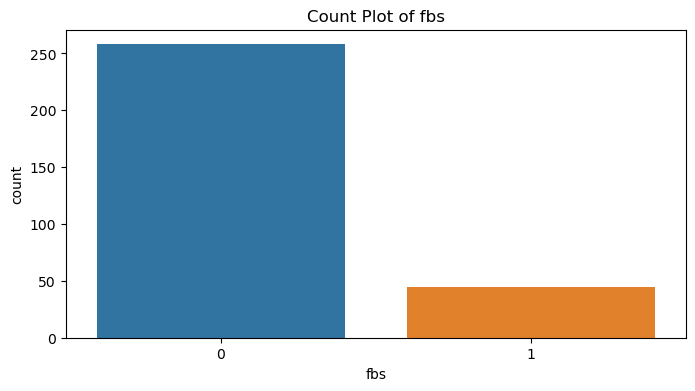

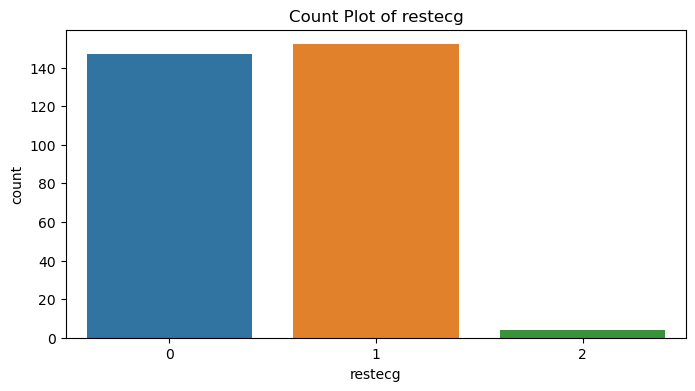

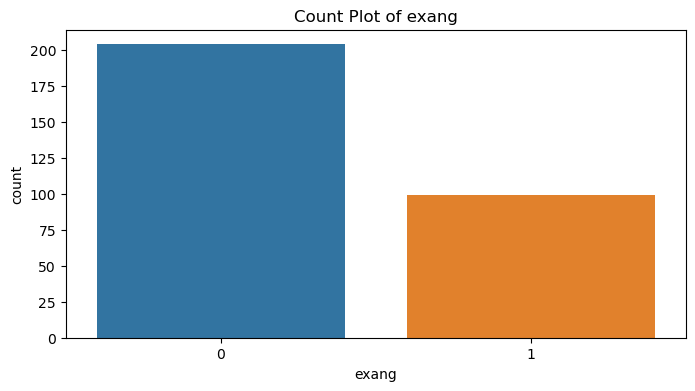

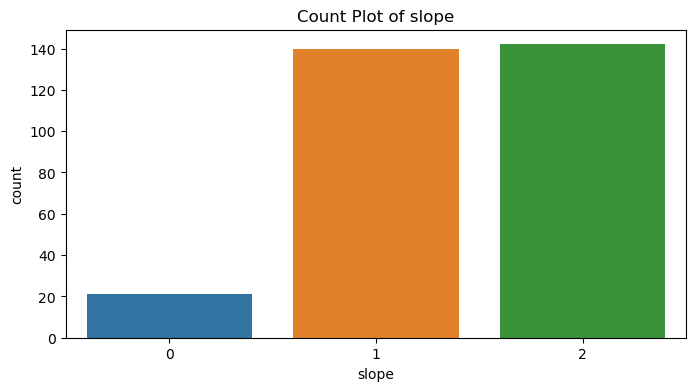

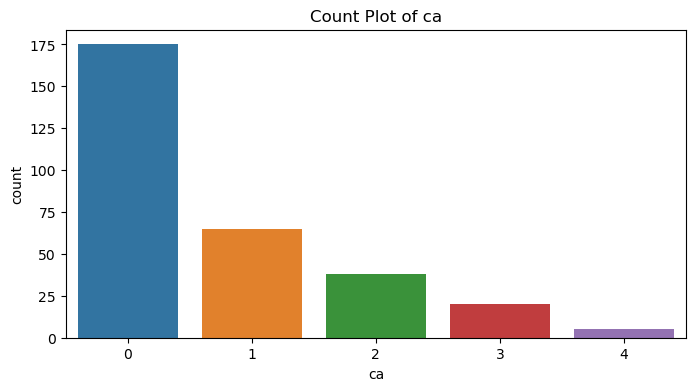

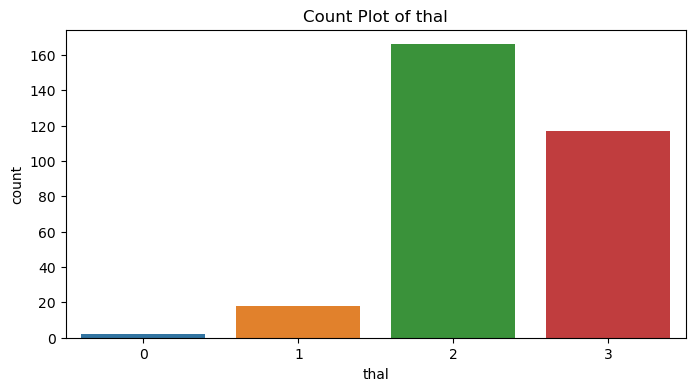

In [ ]:
# Identify categorical variables
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=var, data=cardio_data)
    plt.title(f'Count Plot of {var}')
    plt.show()

## Factors Determining the Occurrence of CVD
We'll list how other factors in the dataset determine the occurrence of cardiovascular diseases.

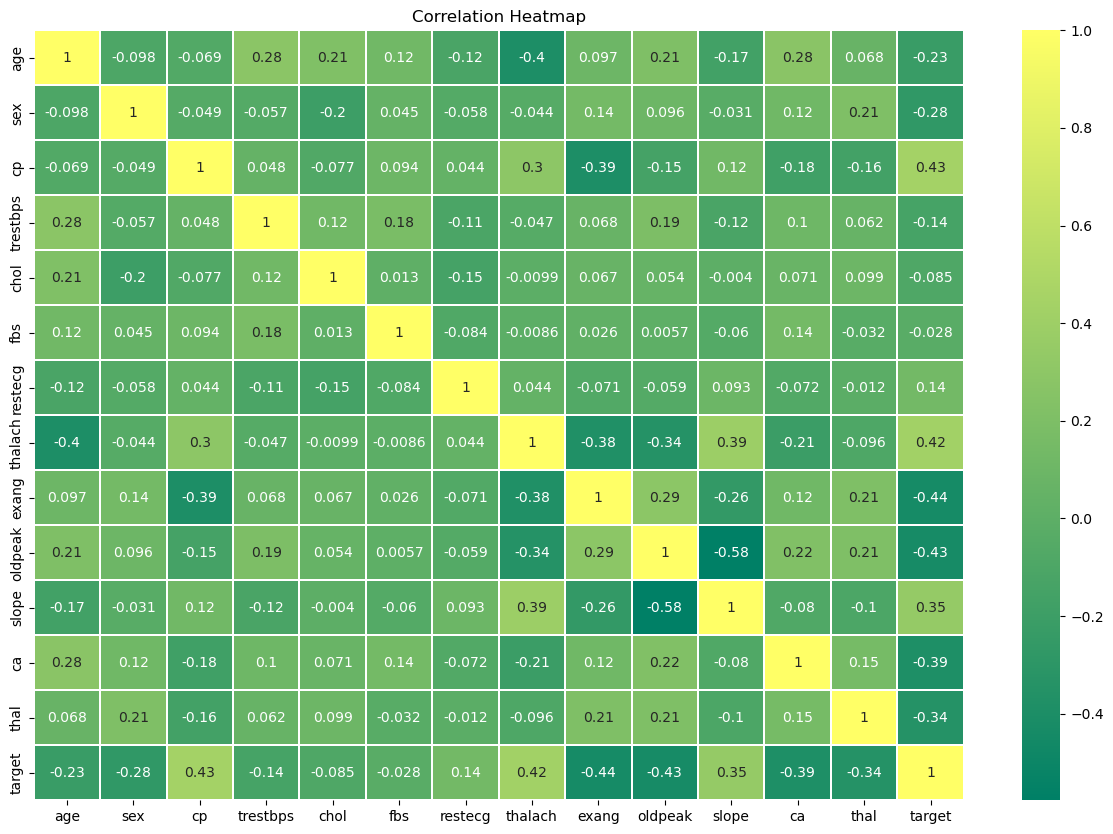

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(cardio_data.corr(),linewidth=.01,annot=True,cmap="summer")
plt.title('Correlation Heatmap')
plt.show()

plt.savefig('correlationfigure')

From the above heatmap, we can understand that `Chest pain(cp)` and target have a positive correlation. It means that whose has a large risk of chest pain results in a greater chance to have heart disease. In addition to `chest pain`, `thalach`, `slope`, and `resting` have a positive correlation with the target.

Then, exercise-induced angina(exan) and the target have a negative correlation which means when we exercise, the heart requires more blood, but narrowed arteries slow down the blood flow. In addition to **ca**, **old peak**, **thal** have a negative correlation with the targetet.

Let us see the relation between each features distribution with help of histogram

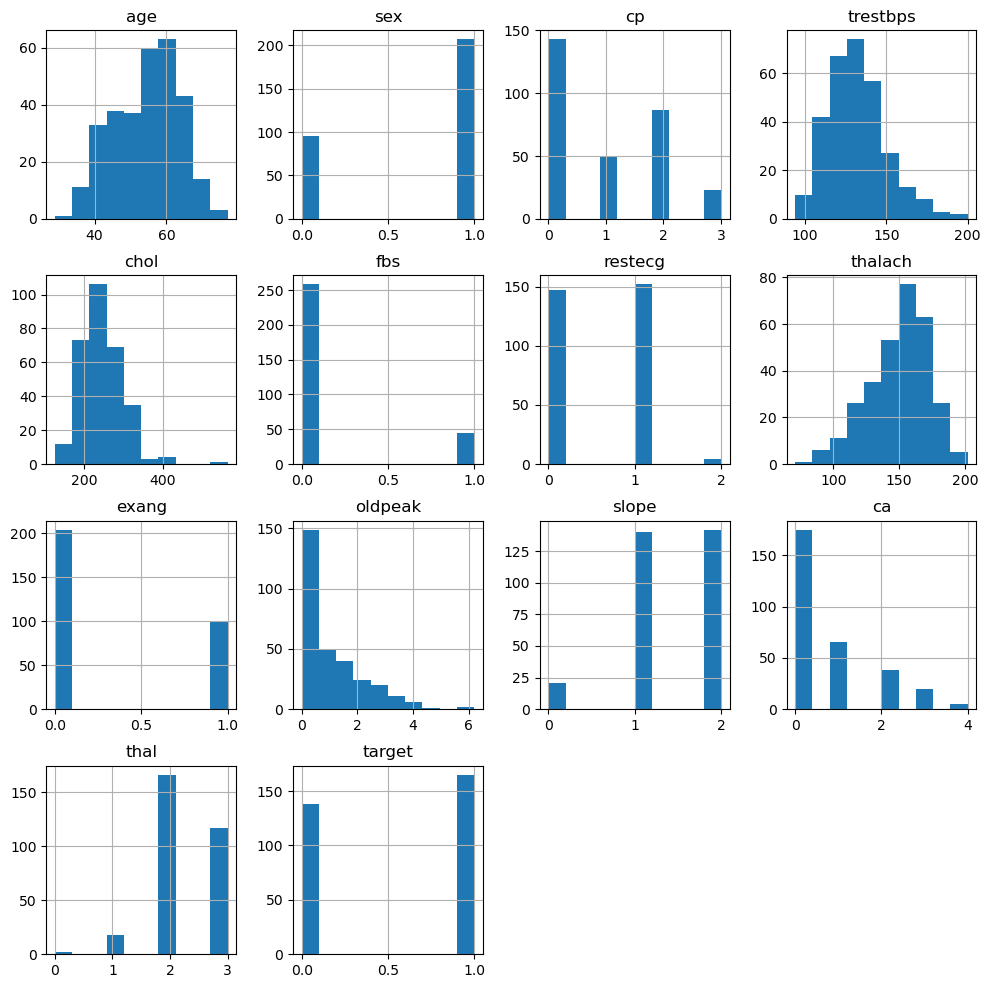

In [ ]:
cardio_data.hist(figsize=(12,12))
plt.savefig('featuresplot')

## Occurrence of CVD Across Age Categories
Let's study the occurrence of cardiovascular diseases across different age categories with a histogram distribution.


The youngest patient is 29
The oldest patient is 77
The mean age is 54.366336633663366




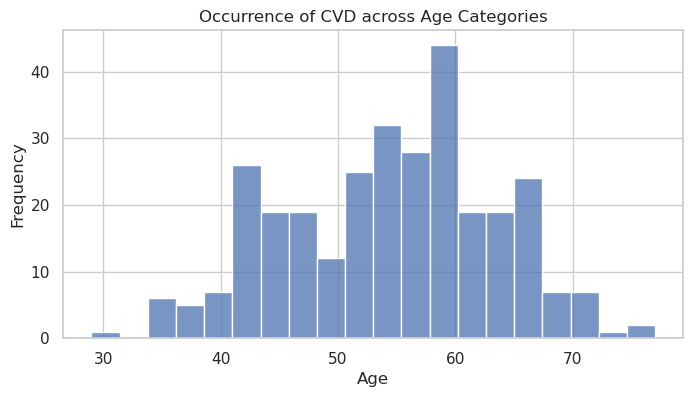

In [ ]:
print(f"The youngest patient is {min(cardio_data.age)}")
print(f"The oldest patient is {max(cardio_data.age)}")
print(f"The mean age is {cardio_data.age.mean()}")
print("\n")

# Set the style for Seaborn
sns.set(style='whitegrid')

# Create the histogram plot using Seaborn
plt.figure(figsize=(8, 4))
sns.histplot(data=cardio_data, x='age', bins=20, kde=False)
plt.title('Occurrence of CVD across Age Categories')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Composition of Patients by Sex
We'll study the composition of all patients with respect to the sex category.

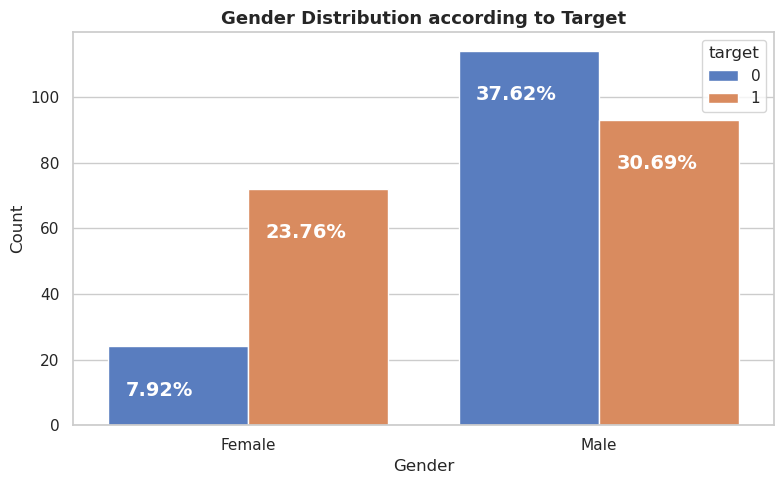

In [ ]:
# Set the style for Seaborn
sns.set(style='whitegrid')

# Create the count plot for gender distribution according to the target variable
fig, ax = plt.subplots(figsize=(8, 5))
gender = cardio_data['sex']
ax = sns.countplot(x='sex', hue='target', data=cardio_data, palette='muted')

# Set the title and x-axis labels
ax.set_title("Gender Distribution according to Target", fontsize=13, weight='bold')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_xticklabels(['Female', 'Male'])  # Explicitly set x-axis labels

# Add percentage annotations
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x() + 0.05, i.get_height() - 15,
            f"{round((i.get_height() / total) * 100, 2)}%", fontsize=14,
            color='white', weight='bold')

plt.tight_layout()
plt.show()

From the bar graph, we can observe that among disease patients, males are higher than females.

## Detecting Heart Attacks based on Resting Blood Pressure
We'll study if heart attacks can be detected based on anomalies in resting blood pressure (trestbps).

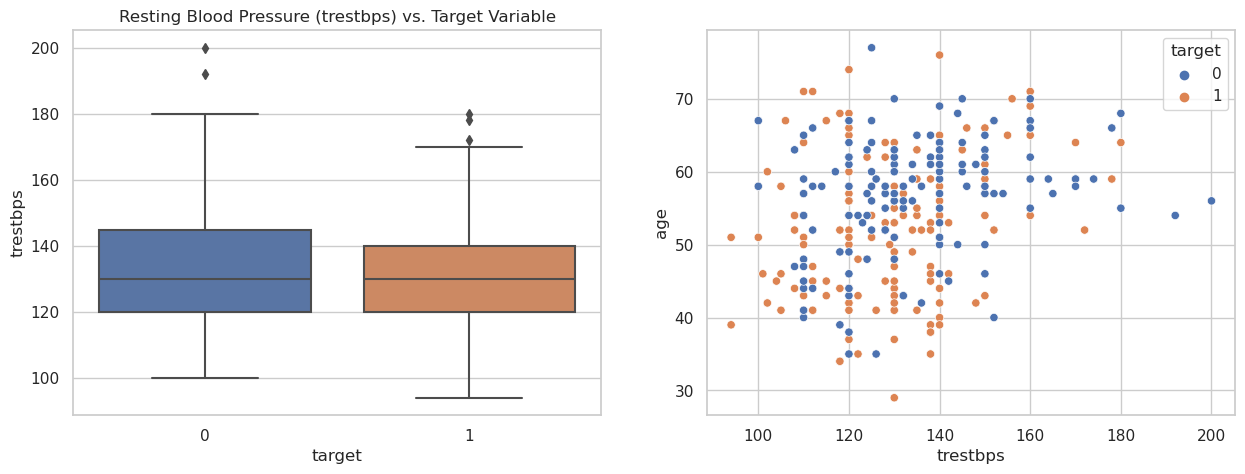

In [ ]:
plt.figure(figsize=(15, 5))

# plotting subplot #1 - Box plot of resting blood pressure by target variable
plt.subplot(1,2,1)
sns.boxplot(x='target', y='trestbps', data=cardio_data)
plt.title('Resting Blood Pressure (trestbps) vs. Target Variable')

# plotting subplot #2 - Scatter plot of resting blood pressure by target variable
plt.subplot(1,2,2)
sns.scatterplot(y=cardio_data.age, x=cardio_data.trestbps, hue= cardio_data.target)

plt.show()

We observe that people who develop CVD have lower resting bp than people who don't develop CVD

## Relationship between Cholesterol Levels and Target Variable
Let's describe the relationship between cholesterol levels (chol) and the target variable.

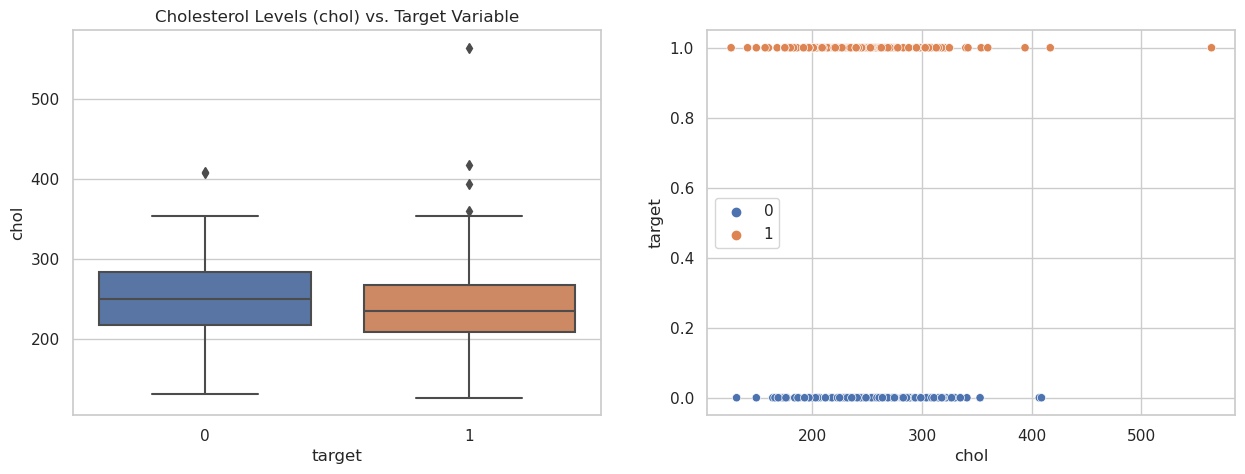

In [ ]:
plt.figure(figsize=(15, 5))

# plotting subplot #1 - Box plot of cholesterol levels by target variable
plt.subplot(1,2,1)
sns.boxplot(x='target', y='chol', data=cardio_data)
plt.title('Cholesterol Levels (chol) vs. Target Variable')

# plotting subplot #2 - Scatter plot of cholesterol levels by target variable
plt.subplot(1,2,2)
sns.scatterplot(x=cardio_data.chol, y=cardio_data.target, hue=cardio_data.target)
plt.legend(loc='center left')

plt.show()

We can infer that people who develop CVD have much higher level of cholestrol and concentrated within the range between 200 - 300.

## Relationship between Peak Exercising and Heart Attack Occurrence
We'll explore the relationship between peak exercising (oldpeak) and the occurrence of a heart attack.

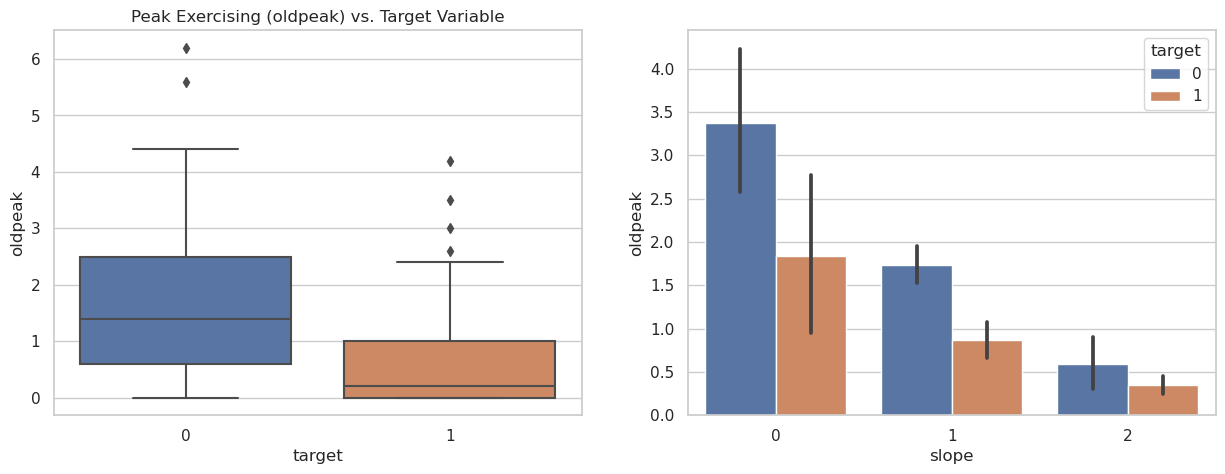

In [ ]:
plt.figure(figsize=(15, 5))

# plotting subplot #1 - Box plot of peak exercising (oldpeak) by target variable
plt.subplot(1,2,1)
sns.boxplot(x='target', y='oldpeak', data=cardio_data)
plt.title('Peak Exercising (oldpeak) vs. Target Variable')

# plotting subplot #2 - Bar plot of peak exercising (oldpeak) by target variable
plt.subplot(1,2,2)
sns.barplot(y=cardio_data.oldpeak, x=cardio_data.slope, hue=cardio_data.target)

plt.show()


We can infer that **oldpeak** is lower in people who develop CVD.

## Checking if Thalassemia is a Major Cause of CVD
Let's check if thalassemia is a major cause of cardiovascular diseases.

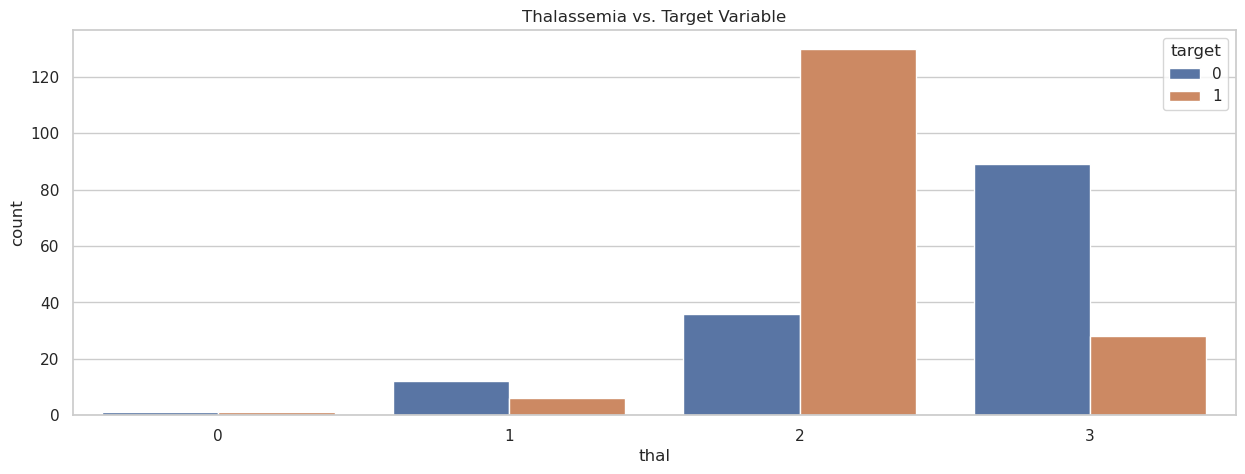

In [ ]:
# Count plot of thalassemia by target variable
plt.figure(figsize=(15, 5))
sns.countplot(x='thal', hue='target', data=cardio_data)
plt.title('Thalassemia vs. Target Variable')
plt.show()


**Thalassemia** can be a major cause for CVD as it is more associated in 2.

## Pair Plot to Understand Variable Relationships
Lastly, we'll use a pair plot to understand the relationship between all the given variables.

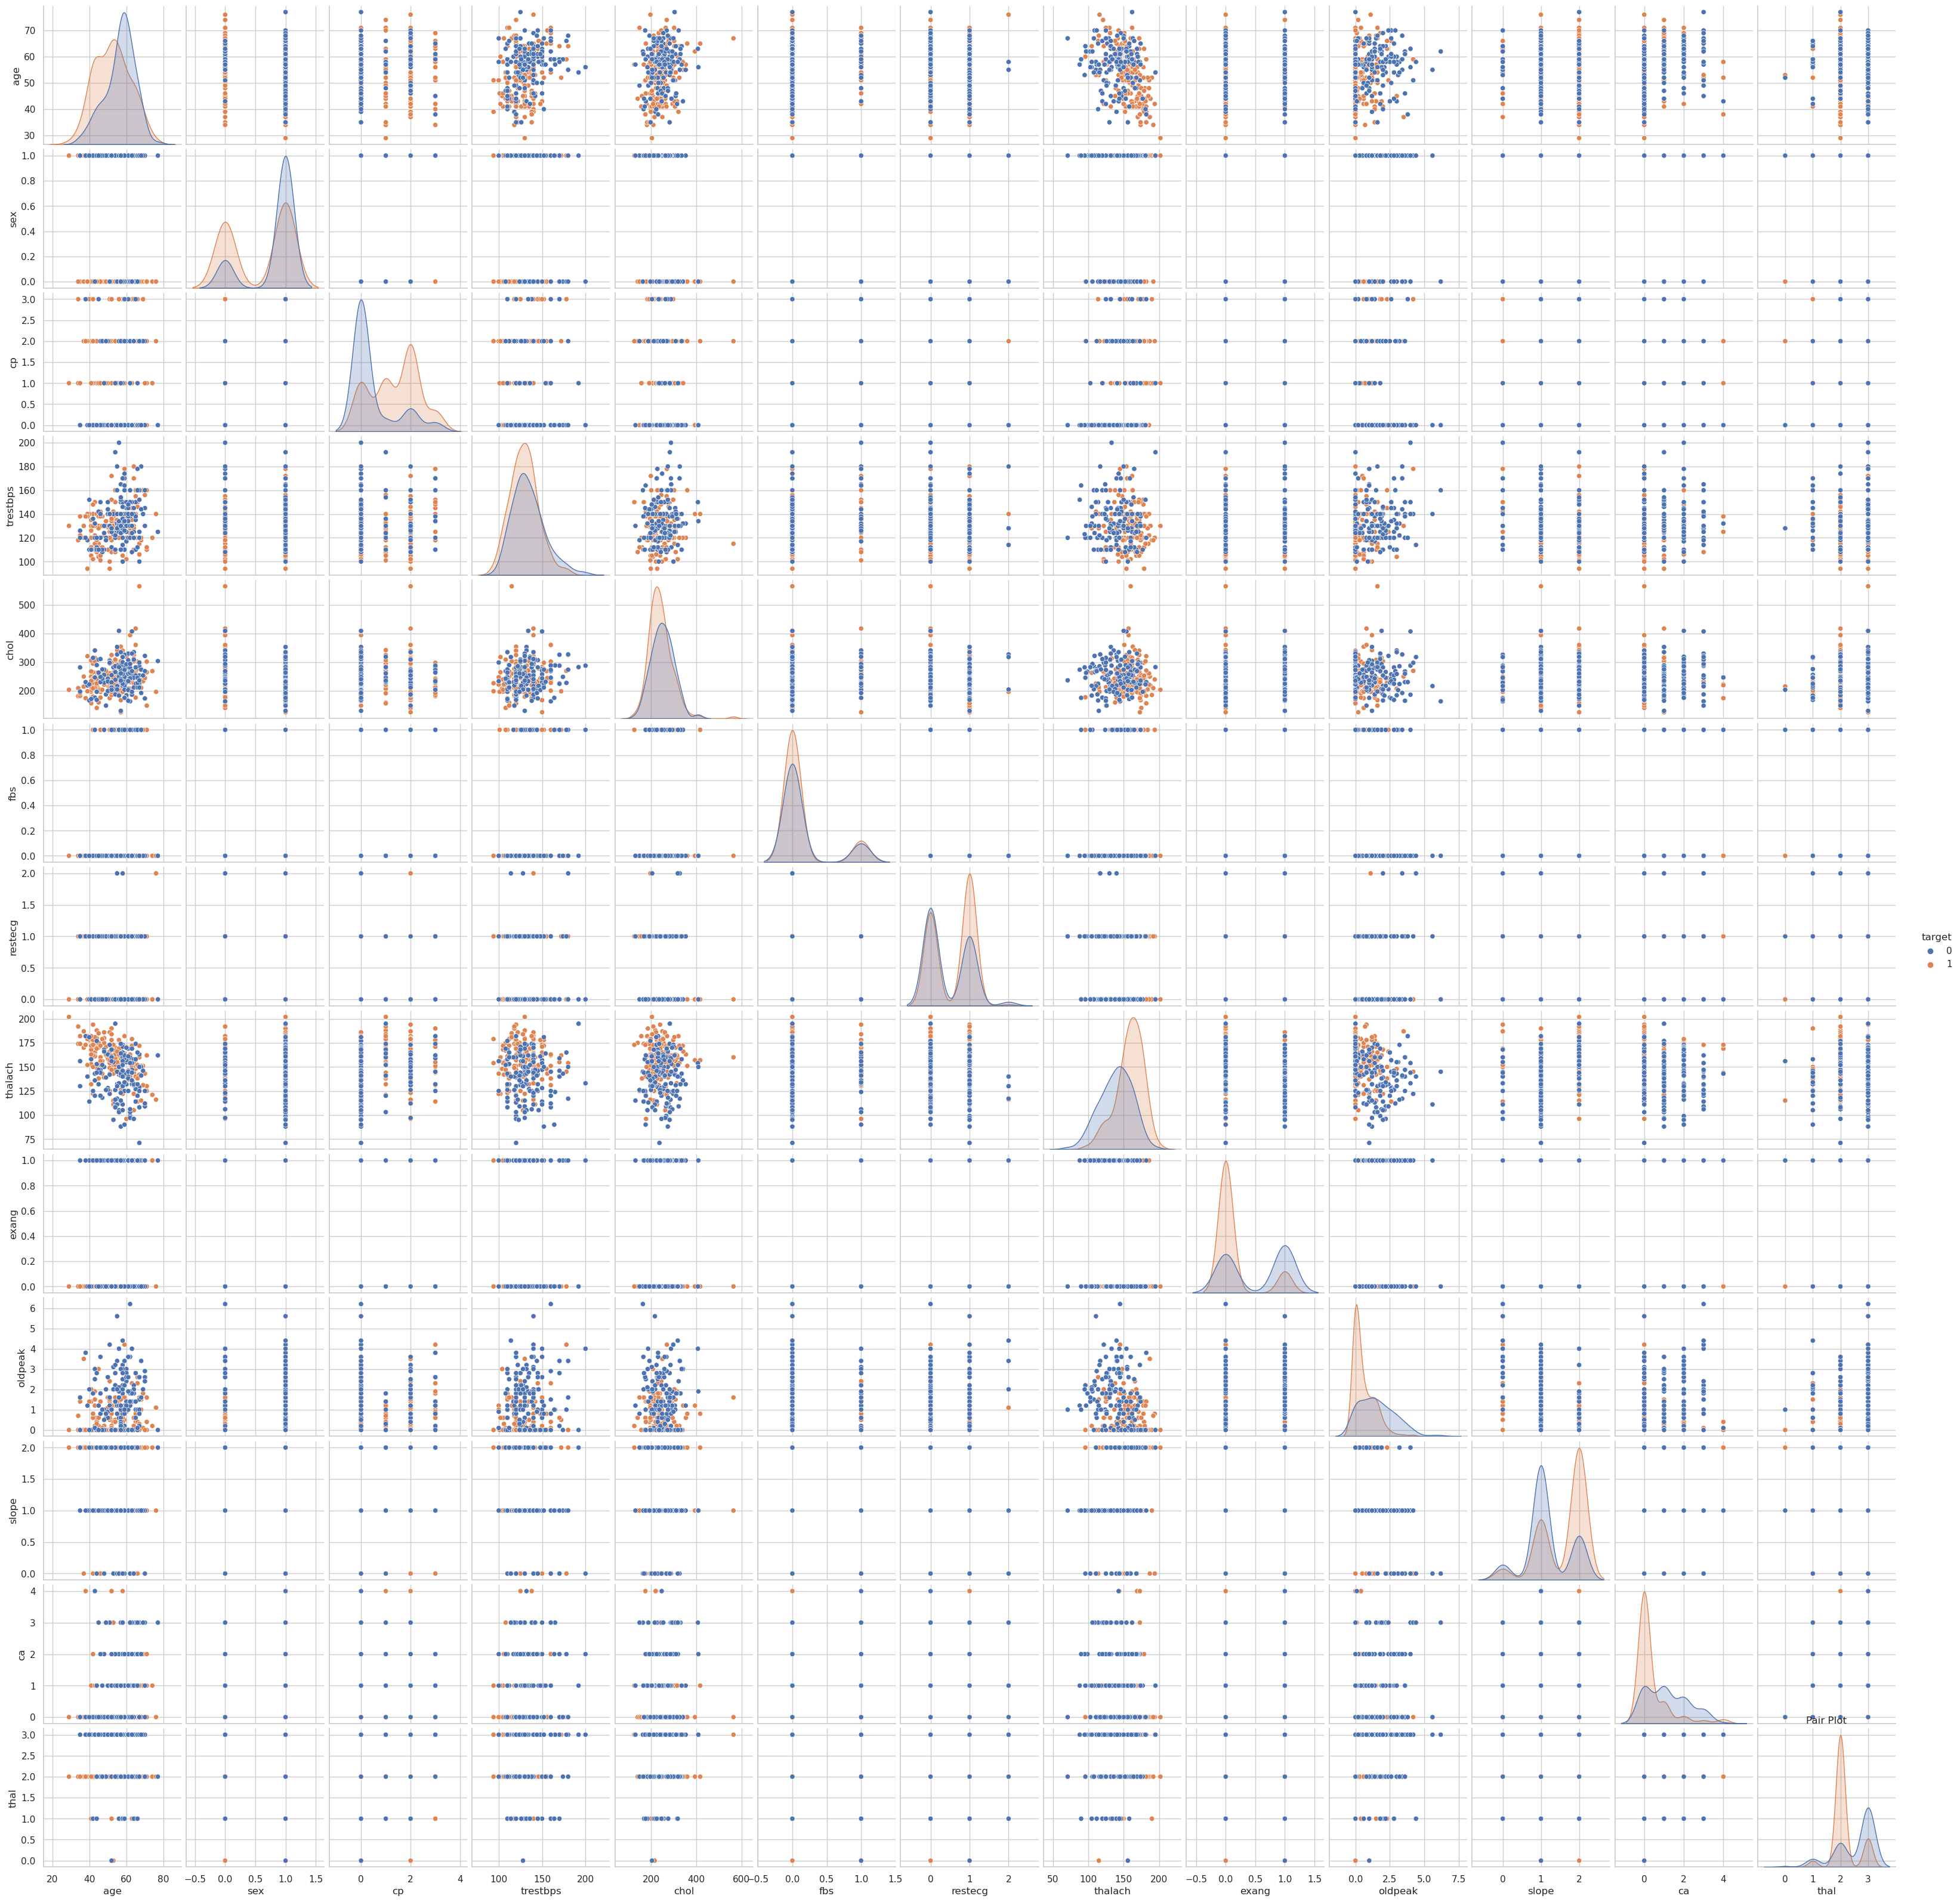

In [ ]:
# Pair plot
sns.pairplot(cardio_data, hue='target')
plt.title('Pair Plot')
plt.show()


# Automated EDA using ydata-profiling report

In the provided code, we are using the `ydata_profiling` library to create a profiling report for the "cardio_data" dataset. The `ProfileReport` function takes the **"cardio_data"** dataset as input and generates a comprehensive profiling report. This report will include valuable insights such as data statistics, missing values, data types, unique values, correlation, and visualizations for better data understanding. The title of the report is set as **"Heart Disease Profiling Report."** This analysis will help users to gain a deeper understanding of the dataset, identify potential issues, and make informed decisions during the data exploration and preprocessing stages.

In [ ]:
from ydata_profiling import ProfileReport

profile_cardio_data = ProfileReport(cardio_data, title="Heart Disease Profiling Report")

In [ ]:
profile_cardio_data.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Exporting the report to HTML.

profile_cardio_data.to_file("Heart Disease Profiling Report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Model Building and Implementation

## Train-Test Split

We split the whole dataset into trainset and testset which contains `75% train` and `25% test`.

We can include this train set into classifiers to train our model and the test set is useful for predicting the performance of the model by different classifiers.

In [ ]:
# Modeling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree and Data Visualisation
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
# Features
X = cardio_data.drop('target', axis=1)
# Target Variable
y = cardio_data['target']

print('shape of X and y respectively :', X.shape, y.shape)

shape of X and y respectively : (303, 13) (303,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=40)

print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (227, 13)
X_test: (76, 13)
y_train: (227,)
y_test: (76,)


## Logistic Regression with Statsmodel

In [ ]:
import statsmodels.api as sm

In [ ]:
logreg_stats = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.371141
         Iterations 7


In [ ]:
print(logreg_stats.summary())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  227
Model:                          Logit   Df Residuals:                      214
Method:                           MLE   Df Model:                           12
Date:                Thu, 27 Jul 2023   Pseudo R-squ.:                  0.4618
Time:                        11:20:30   Log-Likelihood:                -84.249
converged:                       True   LL-Null:                       -156.55
Covariance Type:            nonrobust   LLR p-value:                 7.046e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0228      0.023      0.997      0.319      -0.022       0.068
sex           -1.6290      0.519     -3.138      0.002      -2.647      -0.612
cp             0.9382      0.220      4.265      0.0

In [ ]:
logreg_prediction = logreg_stats.predict(X_test)
predictions = list(map(round, logreg_prediction))
print(predictions)

[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]


Accuracy score: 0.881578947368421 -> 88.16%
Recall score: 0.9285714285714286 -> 92.86%
Precision score: 0.8666666666666667 -> 86.67%
f1 score: 0.896551724137931 -> 89.66%


<AxesSubplot:>

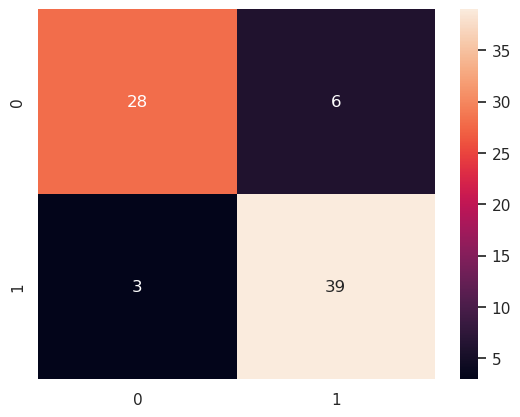

In [ ]:
accuracy = accuracy_score(y_test, predictions)
recall = recall_score(y_test, predictions)
precision = precision_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Displaying the scores with their corresponding percentages using f-strings
print(f'Accuracy score: {accuracy} -> {accuracy * 100:.2f}%')
print(f'Recall score: {recall} -> {recall * 100:.2f}%')
print(f'Precision score: {precision} -> {precision * 100:.2f}%')
print(f'f1 score: {f1} -> {f1 * 100:.2f}%')

logreg_stats_cm = confusion_matrix(y_test,predictions)
sns.heatmap(logreg_stats_cm,annot=True)

## Logistic Regression with scikit-learn

In [ ]:
from sklearn.linear_model import LogisticRegression

# initialize the model
logreg_model = LogisticRegression(max_iter=1000)
# fit the model
logreg_model.fit(X_train, y_train)
# prediction
Y_prediction = logreg_model.predict(X_test)

In [ ]:
score = logreg_model.score(X_train, y_train)
print(f'Training Score: {score} -> {score * 100:.2f}%')

score = logreg_model.score(X_test, y_test)
print(f'Testing Score: {score} -> {score * 100:.2f}%')

print("\n")

# Heart-Disease yes or no? 1/0
output = pd.DataFrame({'Predicted':Y_prediction})
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]

rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)

print(f'% of people predicted with heart-disease: {rate_people} -> {rate_people * 100:.2f}%')

score_logreg = score
out_logreg = output

Training Score: 0.8414096916299559 -> 84.14%
Testing Score: 0.881578947368421 -> 88.16%


   Predicted
0          0
1          1
2          1
3          0
4          1
% of people predicted with heart-disease: 0.5921052631578947 -> 59.21%


Now let's evaluate a logistic regression model's performance on the test dataset using a classification report, which includes precision, recall, F1-score, and support metrics for each class. Additionally, we will generate a heatmap of the confusion matrix to visualize the true positive, false positive, true negative, and false negative predictions. This assessment allows a quick and comprehensive understanding of how well the model performs in predicting the target variable for different classes, aiding in the evaluation and interpretation of its predictive capabilities.

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        34
           1       0.87      0.93      0.90        42

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



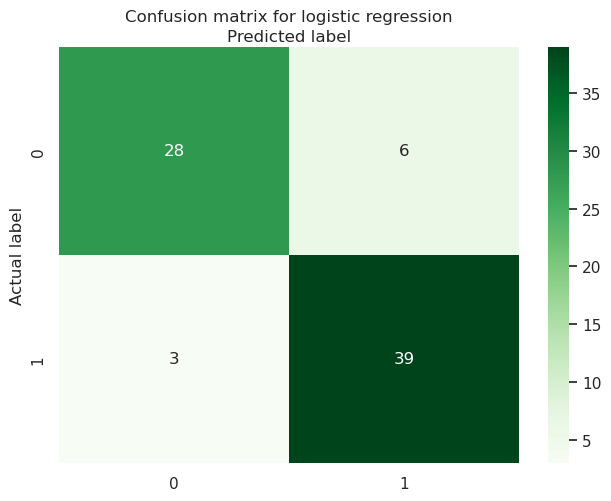

In [ ]:
from sklearn.metrics import confusion_matrix

print(classification_report(y_test,Y_prediction))

logreg_confusion_matrix = confusion_matrix(y_test,Y_prediction)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(logreg_confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for logistic regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

The Receiver Operating Characteristic (ROC) curve calculates the probabilities of the positive class (heart disease present) using `predict_proba`, and then computes the false positive rate (FPR), true positive rate (TPR), and corresponding thresholds using `roc_curve` from `sklearn.metrics`. The resulting curve is plotted using matplotlib, with the green line representing the ROC curve and a dashed line indicating the baseline (random guessing) performance. The plot also includes vertical and horizontal lines at 0 and 1, respectively, to mark the extreme points. The area under the ROC curve (AUC) is displayed on the plot, providing a single-value summary of the model's discrimination performance.

A higher AUC indicates better model performance in distinguishing between positive and negative cases. This visualization helps to assess the model's overall performance and choose an appropriate probability threshold for classification based on the trade-off between false positives and true positives.

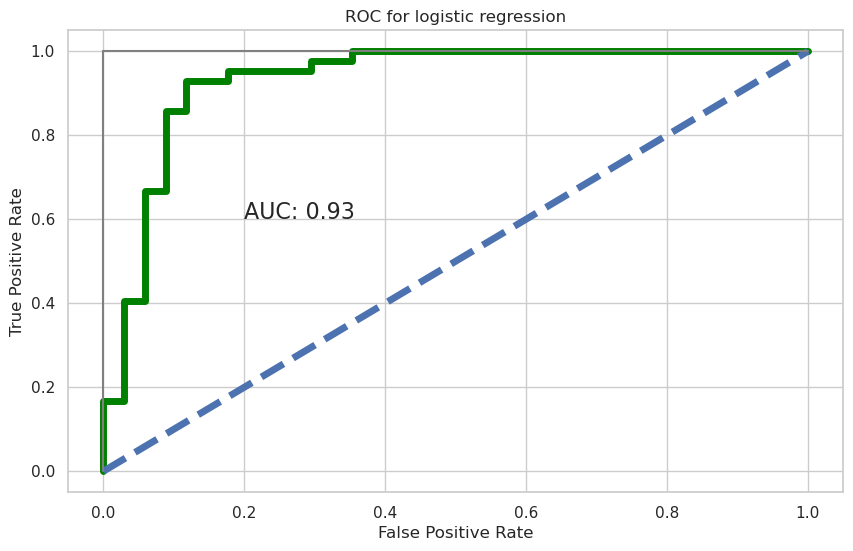

In [ ]:
# ROC Curve
y_probabilities = logreg_model.predict_proba(X_test)[:,1]
false_positive_rate_knn, true_positive_rate_knn, threshold_knn = roc_curve(y_test,y_probabilities)

plt.figure(figsize=(10,6))
plt.title('ROC for logistic regression')
plt.plot(false_positive_rate_knn, true_positive_rate_knn, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Random Forest Classifier

Let's first fit and the evaluate a base model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# initialize the model
rfc_model = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
# fit the model
rfc_model.fit(X_train, y_train)
# prediction
Y_prediction = rfc_model.predict(X_test)

In [ ]:
score = rfc_model.score(X_train, y_train)
print(f'Training Score: {score} -> {score * 100:.2f}%')

score = rfc_model.score(X_test, y_test)
print(f'Testing Score: {score} -> {score * 100:.2f}%')

accuracy = accuracy_score(y_test, Y_prediction)
print(f'Accuracy score: {accuracy} -> {accuracy * 100:.2f}%')

print("\n")

# Heart-Disease yes or no? 1/0
output = pd.DataFrame({'Predicted':Y_prediction})
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]

rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)

print(f'% of people predicted with heart-disease: {rate_people} -> {rate_people * 100:.2f}%')

score_rfc = score
out_rfc = output

Training Score: 1.0 -> 100.00%
Testing Score: 0.8552631578947368 -> 85.53%
Accuracy score: 0.8552631578947368 -> 85.53%


   Predicted
0          1
1          0
2          1
3          0
4          1
% of people predicted with heart-disease: 0.5394736842105263 -> 53.95%


### Visualizing the Results

Let's display the first three decision trees from the random forest classifier (rfc_model). The loop iterates three times, and for each iteration, it retrieves one decision tree from the random forest using `rfc_model.estimators_[i]`. It then uses `export_graphviz` from `sklearn.tree` to generate a Graphviz dot data representation of the decision tree. The visualization options include displaying feature names, filling tree nodes with colors based on class proportions, and limiting the tree depth to 2 levels (`max_depth=2`). The `graphviz.Source` function is used to create a graph from the dot data, and the `display` function shows the decision tree as an image in the notebook for visual inspection.

This export and display process allows for a closer examination of individual trees within the random forest ensemble, helping to understand the different decision paths and feature importance in the model's decision-making process.

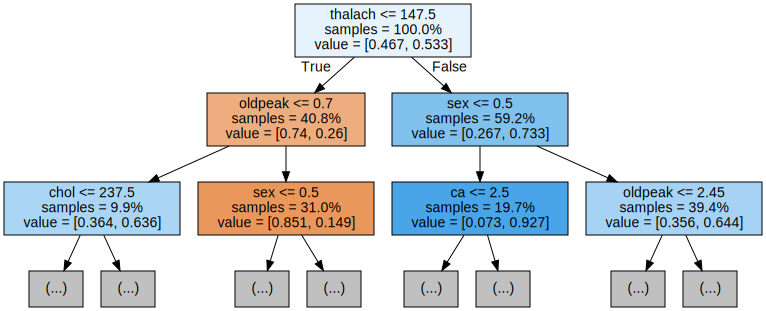

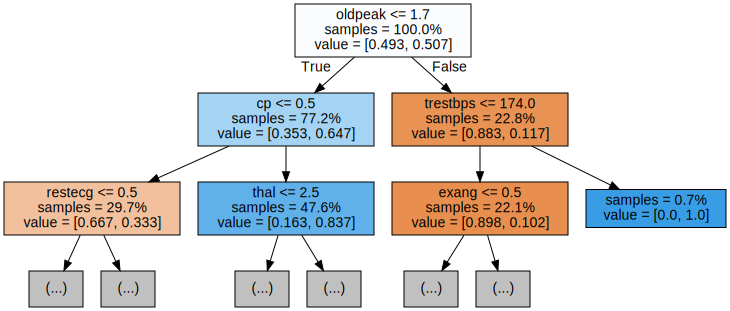

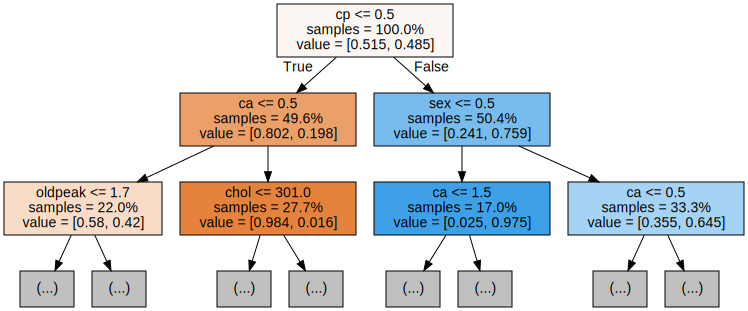

In [ ]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rfc_model.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

### Hyperparameter Tuning

The code below uses Scikit-Learn’s **RandomizedSearchCV**, which will randomly search parameters within a range per hyperparameter. We define the hyperparameters to use and their ranges in the param_dist dictionary. In our case, we are using:

* **n_estimators**: the number of decision trees in the forest. ncreasing this hyperparameter generally improves the performance of the model but also increases the computational cost of training and predicting.
* **max_depth**: the maximum depth of each decision tree in the forest. Setting a higher value for max_depth can lead to overfitting while setting it too low can lead to underfitting.


In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rfc_model,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0d1b044490>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0d1724a4a0>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 4, 'n_estimators': 161}


              precision    recall  f1-score   support

           0       0.83      0.85      0.84        34
           1       0.88      0.86      0.87        42

    accuracy                           0.86        76
   macro avg       0.85      0.86      0.85        76
weighted avg       0.86      0.86      0.86        76



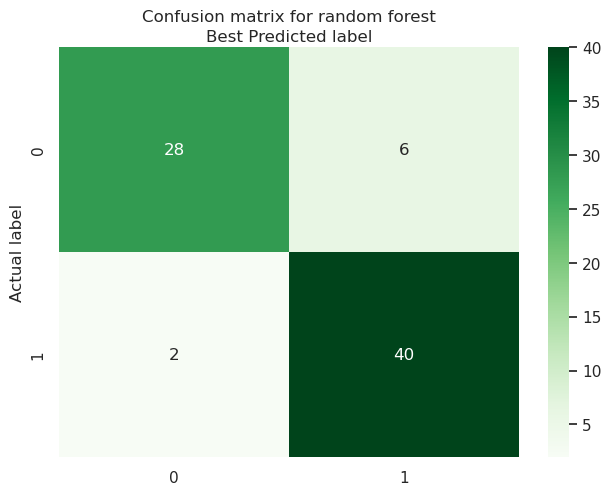

In [ ]:
print(classification_report(y_test,Y_prediction))

# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
rfc_confusion_matrix = confusion_matrix(y_test, y_pred)

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(rfc_confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for random forest')
plt.ylabel('Actual label')
plt.xlabel('Best Predicted label')
plt.show()

We should also evaluate the best model with accuracy, precision, and recall (note your results may differ due to randomization)

In [ ]:
score = best_rf.score(X_train, y_train)
print(f'Training Score: {score} -> {score * 100:.2f}%')

score = best_rf.score(X_test, y_test)
print(f'Testing Score: {score} -> {score * 100:.2f}%')

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Displaying the scores with their corresponding percentages using f-strings
print(f'Accuracy score: {accuracy} -> {accuracy * 100:.2f}%')
print(f'Recall score: {recall} -> {recall * 100:.2f}%')
print(f'Precision score: {precision} -> {precision * 100:.2f}%')

score_best_rfc = score
out_best_rfc = output

Training Score: 0.9030837004405287 -> 90.31%
Testing Score: 0.8947368421052632 -> 89.47%
Accuracy score: 0.8947368421052632 -> 89.47%
Recall score: 0.9523809523809523 -> 95.24%
Precision score: 0.8695652173913043 -> 86.96%


The below code plots the importance of each feature, using the model’s internal score to find the best way to split the data within each decision tree.

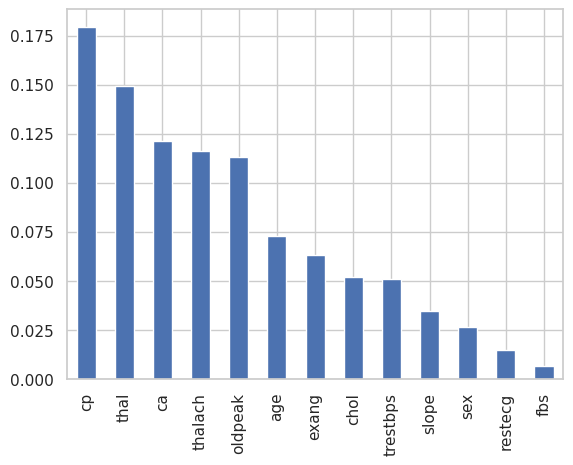

In [ ]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

Let's also evalaute and display the ROC curve for the best Random Forest model

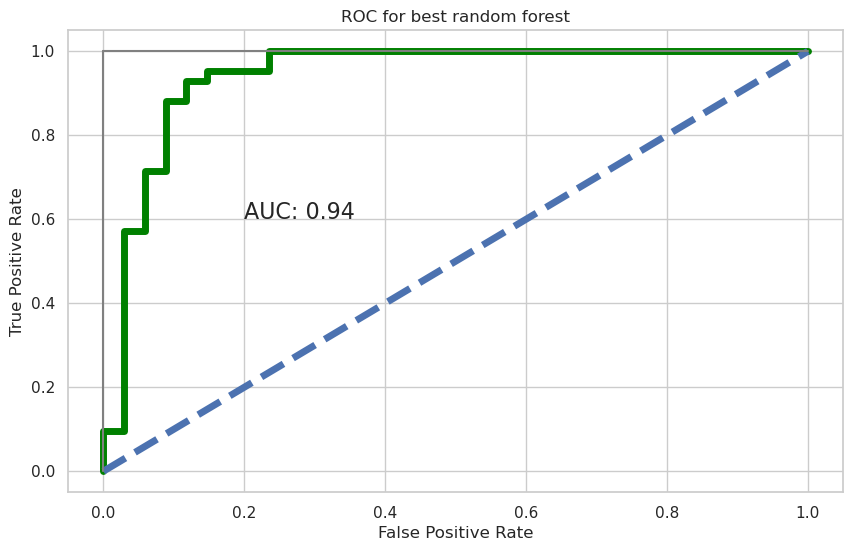

In [ ]:
y_probabilities = best_rf.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold_knn = roc_curve(y_test,y_probabilities)
plt.figure(figsize=(10,6))
plt.title('ROC for best random forest')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Conclusion

To wrap up the model performance comparison, let's create a new DataFrame called `results` to store the evaluation scores of different models. It adds the scores of three models: 'Logistic Regression', 'Base Model Random Forest Classifier', and 'Best Model Random Forest Classifier'.

Next, the code sorts the DataFrame in descending order based on the 'score' column using `sort_values` and applies a background gradient with green colors ('Greens' colormap) to the 'score' column using `style.background_gradient`. This styling enhances the visual representation of the scores, with higher scores appearing with darker shades of green. This tabular presentation allows for a quick comparison of the model performances, helping to identify the best-performing model at a glance.

In [ ]:
results=pd.DataFrame(columns=['score'])
results.loc['Logistic Regression']=[score_logreg]
results.loc['Base Model Random Forest Classifier']=[score_rfc]
results.loc['Best Model Random Forest Classifier']=[score_best_rfc]

results.sort_values('score',ascending=False).style.background_gradient(cmap='Greens',subset=['score'])